### Imports

In [43]:
import os
import pandas as pd

### Global Variabels

In [44]:
path = 'C:\\Users\\Miguel-PC\\Desktop\\RI_lab2\\Model-outputs'
file_data="stats.csv"
file_data_o="stats_o.csv"

### Function that gets the files in a path

In [45]:
def get_all_trec_outputs(path):
    return [file for file in os.listdir(path) if file[0] != '.']

**This is just some testing you can ignore it**

In [46]:
path_files = get_all_trec_outputs(path)

In [47]:
path_files

['Nova pasta',
 'Nova pasta (2)',
 'Nova pasta (3)',
 'Nova pasta (4)',
 'Nova pasta (5)',
 'Nova pasta (6)']

### Function that does it all

**Given the absolute path, it return 6 DataFrames:**

    1. Data from stats.csv for all the model (Columns: Model, P10, MAP) -> data
    2. Data from stats_o.csv for all the model (Columns: Model with Ouliers, P10, MAP) -> data_outliers
    3. data sorted by P10
    4. data_outliers by P10
    5. data sorted by MAP
    6. data_outliers by MAP

In [118]:
def make_data(path):   
    data=pd.DataFrame(data={'Model': [], "P10": [], "MAP": []})
    data_outliers=pd.DataFrame(data={'Model with Ouliers': [], "P10": [], "MAP": []})
    for file in path_files:
        path_to_csv=path+"\\"+file
        data_aux = pd.read_csv(path_to_csv+"\\"+file_data)
        data = data.append({'Model': file, 'P10': data_aux["P_10"].values[0], 'MAP': data_aux["map"].values[0]}, ignore_index=True)
        data_aux = pd.read_csv(path_to_csv+"\\"+file_data_o)
        data_outliers = data_outliers.append({'Model with Ouliers': file, 'P10': data_aux["P_10"].values[0], 'MAP': data_aux["map"].values[0]}, ignore_index=True)
    return data, data_outliers, data.sort_values(by=["P10"], ascending=False), data_outliers.sort_values(by=["P10"], ascending=False), data.sort_values(by=["MAP"], ascending=False), data_outliers.sort_values(by=["MAP"], ascending=False)

In [119]:
data1, data1_o, data1_sorted, data1_o_sorted, data1_sorted2, data1_o_sorted2=make_data(path)

In [120]:
data1

,Model,P10,MAP
0,Nova pasta,10.0,10.0
1,Nova pasta (2),11.0,11.0
2,Nova pasta (3),12.0,12.0
3,Nova pasta (4),13.0,13.0
4,Nova pasta (5),14.0,14.0
5,Nova pasta (6),15.0,15.0


In [121]:
data1_o

,Model with Ouliers,P10,MAP
0,Nova pasta,16.0,16.0
1,Nova pasta (2),17.0,17.0
2,Nova pasta (3),13.0,13.0
3,Nova pasta (4),43.0,43.0
4,Nova pasta (5),45.0,45.0
5,Nova pasta (6),46.0,46.0


In [122]:
data1_sorted

,Model,P10,MAP
5,Nova pasta (6),15.0,15.0
4,Nova pasta (5),14.0,14.0
3,Nova pasta (4),13.0,13.0
2,Nova pasta (3),12.0,12.0
1,Nova pasta (2),11.0,11.0
0,Nova pasta,10.0,10.0


In [123]:
data1_o_sorted

,Model with Ouliers,P10,MAP
5,Nova pasta (6),46.0,46.0
4,Nova pasta (5),45.0,45.0
3,Nova pasta (4),43.0,43.0
1,Nova pasta (2),17.0,17.0
0,Nova pasta,16.0,16.0
2,Nova pasta (3),13.0,13.0


In [124]:
data1_sorted2

,Model,P10,MAP
5,Nova pasta (6),15.0,15.0
4,Nova pasta (5),14.0,14.0
3,Nova pasta (4),13.0,13.0
2,Nova pasta (3),12.0,12.0
1,Nova pasta (2),11.0,11.0
0,Nova pasta,10.0,10.0


In [125]:
data1_o_sorted2

,Model with Ouliers,P10,MAP
5,Nova pasta (6),46.0,46.0
4,Nova pasta (5),45.0,45.0
3,Nova pasta (4),43.0,43.0
1,Nova pasta (2),17.0,17.0
0,Nova pasta,16.0,16.0
2,Nova pasta (3),13.0,13.0


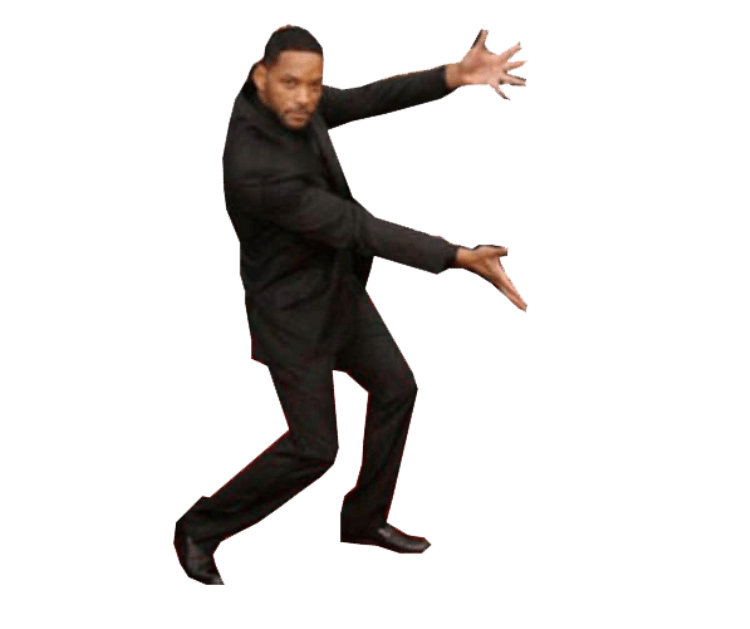